<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Proyecto 2: Análisis de señales ECG </center></font></h2>
<font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
from scipy import fft
import scipy.io as sio;
import seaborn as sns
from scipy.signal import detrend
from scipy import stats

## **1. Contexto**

Para acceder al primer punto del entregable, ingresar al siguiente link: [Contexto](https://docs.google.com/document/d/1AHFgKLsC9z6_BifvLLnRbdTI17usyb4JkE2uwl5ap6U/edit?usp=sharing)

## **2. Extracción de los archivos**

Inicialmente, se carga el archivo Diagnostics.xlsx con el fin de identificar los archivos pertenecientes a los pacientes con  bradicardia sinusal (**SB** Sinus Bradycardia) y fibrilación auricular (**AFIB** Atrial Fibrillation).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
archivo_excel = 'Diagnostics.xlsx"'
df = pd.read_excel("/content/drive/MyDrive/Bioseñales/Diagnostics.xlsx")
df

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


Dado que se conocen los nombres de los archivos que representan las arritmias SB y AFIB, se obtiene una lista con los nombres
de cada archivo para cada arritmia y se imprime su longitud, con el fin de conocer cuántos archivos deberá tener la lista final

In [ ]:
df_SB = df[df["Rhythm"]=="SB"]
df_SB_file_names = df_SB["FileName"]
lista_SB_file_name = df_SB_file_names.tolist()
print(f"Cantidad de archivos para SB (bradicardia sinusal): {len(lista_SB_file_name)}")

df_AFIB = df[df["Rhythm"]=="AFIB"]
df_AFIB_file_names = df_AFIB["FileName"]
lista_AFIB_file_name = df_AFIB_file_names.tolist()
print(f"Cantidad de archivos para AFIB (fibrilación auricula): {len(lista_AFIB_file_name)}")

Cantidad de archivos para SB (bradicardia sinusal): 3889
Cantidad de archivos para AFIB (fibrilación auricula): 1780


Ahora, se recorre la carpeta de archivos en la carpeta ECGDataDenoised (ya descomprimida) que coincidan en nombre con los nombres de los archivos en cada una de las listas mencionadas anteriormente. Posteriormente, se verifica que la lista de archivos tenga el mismo número de elementos que la lista con los nombres

In [ ]:
carpeta_data = os.listdir('/content/drive/MyDrive/Bioseñales/ECGDataDenoised')
lista_SB = []
for archivo in carpeta_data:
    for nombre in lista_SB_file_name:
        if archivo in f"{nombre}.csv":
            lista_SB.append(archivo)


print(len(lista_SB))

3889


In [ ]:
lista_AFIB = []
for archivo in carpeta_data:
    for nombre in lista_AFIB_file_name:
        if archivo in f"{nombre}.csv":
            lista_AFIB.append(archivo)

print(len(lista_AFIB))

1780


Ahora, se pocede a extraer los datos pertenecientes a la segunda derivación de cada archivo (tanto para SB como para AFIB)

In [ ]:
def obtener_II_derivacion(ruta_carpeta, nombre_archivo, columnas):
    ruta = os.path.join(ruta_carpeta, nombre_archivo)
    try:
        data_frame = pd.read_csv(ruta, delimiter=',', names=columnas)
        signal = data_frame["II"]
    except FileNotFoundError:
        print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')
    return signal

In [ ]:
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGDataDenoised'
list_SB_II = []
for archivo in lista_SB:
    signal = obtener_II_derivacion(ruta_carpeta, archivo, names)
    data = {"Nombre Archivo": archivo, "II": signal}
    list_SB_II.append(data)

df_SB = pd.DataFrame(list_SB_II)

In [ ]:
df_SB

,Nombre Archivo,II
0,MUSE_20180116_181214_58000.csv,0 -2.96280 1 -0.42197 2 1.3...
1,MUSE_20180118_125051_70000.csv,0 0.56983 1 13.10600 2 22.6...
2,MUSE_20180118_125036_12000.csv,0 15.8340 1 5.8949 2 -2.692...
3,MUSE_20180118_124944_51000.csv,0 -72.792 1 -63.767 2 -56.158 3...
4,MUSE_20180118_124940_24000.csv,0 -47.40800 1 -50.23700 2 -51.6...
...,...,...
3884,MUSE_20180115_133304_67000.csv,0 -0.80353 1 3.35820 2 ...
3885,MUSE_20180114_073454_67000.csv,0 44.26900 1 43.06000 2 41.6...
3886,MUSE_20180115_133200_20000.csv,0 42.4660 1 25.2670 2 10....
3887,MUSE_20180115_133002_15000.csv,0 48.3000 1 26.9370 2 9.530...


In [ ]:
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGDataDenoised'
list_AFIB_II = []

for archivo in lista_AFIB:
    signal = obtener_II_derivacion(ruta_carpeta, archivo, names)
    data = {"Nombre Archivo": archivo, "II": signal}
    list_AFIB_II.append(data)

df_AFIB = pd.DataFrame(list_AFIB_II)

In [ ]:
df_AFIB

,Nombre Archivo,II
0,MUSE_20180112_124050_59000.csv,0 -11.2340 1 -2.2134 2 4.181...
1,MUSE_20180113_124600_21000.csv,0 -0.76248 1 4.55190 2 8.5...
2,MUSE_20180114_073251_45000.csv,0 14.9210 1 11.1850 2 7.088...
3,MUSE_20180114_115736_22000.csv,0 -21.778 1 3.595 2 21.007 3...
4,MUSE_20180112_165409_12000.csv,0 -2.3120 1 -8.3652 2 -14.955...
...,...,...
1775,MUSE_20180115_133556_54000.csv,0 -10.6630 1 -4.8841 2 -1.699...
1776,MUSE_20180112_074903_07000.csv,0 164.2800 1 137.5700 2 120....
1777,MUSE_20180114_121533_70000.csv,0 12.7990 1 -7.0326 2 -22.551...
1778,MUSE_20180114_073026_18000.csv,0 2.27190 1 0.46857 2 -1.8...


## **3. Fórmulas del artículo: Higher order spectral analysis of ECG signals**

La frecuencia de muestreo fué dada en el dataset:

"Thus, we collected and disseminated this novel database that contains 12-lead ECGs of 10,646 patients with **500 Hz** sampling rate that features 11 common rhythms and 67 additional cardiovascular conditions, all labeled by professional experts"

Así mismo, se realizó una investigación sobre qué indica cada una de las fórmulas mencionadas en el artículo, lo cual puede encontrarse en el [Contexto](https://docs.google.com/document/d/1AHFgKLsC9z6_BifvLLnRbdTI17usyb4JkE2uwl5ap6U/edit?usp=sharing)

### **Detrending**

Para esta técnica de eliminación de tendencias se utiliza la librería propia de python scipy.signal

### **Compression**

In [ ]:
def compression(serie):
    xmin = serie.min()
    xmax = serie.max()
    num = serie-xmin
    den = xmax - xmin
    compr = num/den
    return compr

### **Biespectro y Bicoherencia**

In [ ]:
def Bicoherencia_Biespectro(señal_detrending2times, fs, puntos_segmentos):
    lista_segmentos = []
    indices = range(0, len(señal_detrending2times) - puntos_segmentos + 1, puntos_segmentos)
    for i in indices:
        segment = señal_detrending2times[i:i+ puntos_segmentos]
        lista_segmentos.append(segment)
    array_segmentos = np.array(lista_segmentos)
    num_segments = array_segmentos.shape[0]
    fft_segments = np.fft.fft(array_segmentos, n=puntos_segmentos, axis=1)
    fft_segments = fft_segments[:, :puntos_segmentos // 2]
    Biespectro = np. zeros((puntos_segmentos // 2, puntos_segmentos // 2), dtype=complex)
    denominador_bicoherencia= np.zeros((puntos_segmentos // 2, puntos_segmentos // 2), dtype=complex)
    for k in range(num_segments):
        S=fft_segments[k, :]
        for f1 in range(puntos_segmentos // 2):
            for f2 in range(puntos_segmentos //2 - f1):
                f3= f1+ f2
                Biespectro[f1, f2] += S[f1] * S[f2] * np.conj(S[f3])
                denominador_bicoherencia[f1, f2] += np.abs(S[f1] * S[f2] * np.conj(S[f3]))
    Bicoherencia=np.abs(Biespectro)/denominador_bicoherencia

    return Biespectro, Bicoherencia

In [ ]:
def sim_bic(bicoherencia):
  # Se crea una matriz de ceros
    simetria_bicoherencia = np.zeros((10, 20))
    for f1 in range(20):
        for f2 in range(f1, 20 - f1):
            simetria_bicoherencia[f1, f2] = bicoherencia[f1, f2]
    return simetria_bicoherencia

Ahora, probamos lo anterior con una sola señal, tanto para SB como para AFIB

  #### **Para el grupo con AFIB**

In [ ]:
names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGDataDenoised'
archivo = "MUSE_20180114_121533_70000.csv"
ruta = os.path.join(ruta_carpeta, archivo)
try:
    data_AFIB = pd.read_csv(ruta, delimiter=',', names=names)
    signal_AFIB = data_AFIB["II"].values
    signal_detrending_AFIB_1 = detrend(signal)
    signal_compression_AFIB = compression(signal_detrending_AFIB_1)
    signal_detrending_AFIB_2 = detrend(signal_compression_AFIB)
except FileNotFoundError:
    print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')

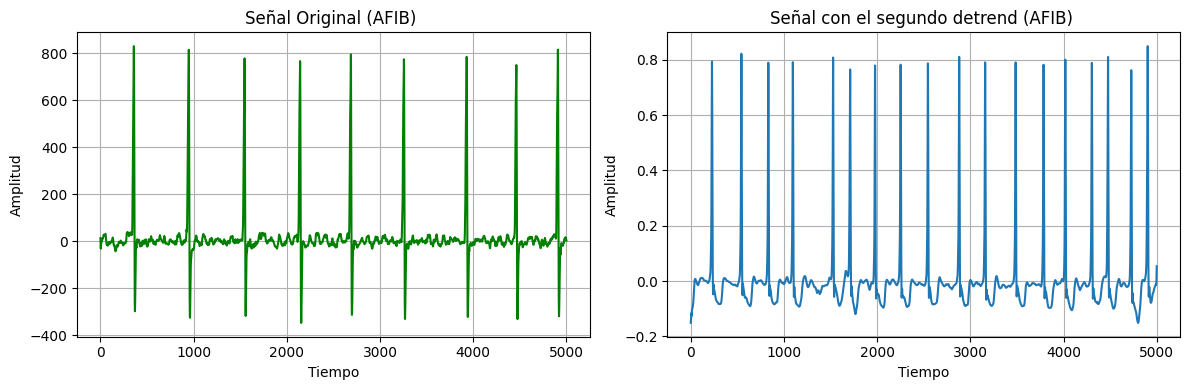

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(signal_AFIB, 'g')
axs[0].set_title('Señal Original (AFIB) ')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

axs[1].plot(signal_detrending_AFIB_2)
axs[1].set_title('Señal con el segundo detrend (AFIB) ')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

plt.tight_layout()
plt.show()

  #### **Para el grupo con SB**

In [ ]:
names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGDataDenoised'
archivo = "MUSE_20180111_160033_11000.csv" # Archivo en la lista SB
ruta = os.path.join(ruta_carpeta, archivo)
try:
    data_frame = pd.read_csv(ruta, delimiter=',', names=names)
    signal_SB = data_frame["II"].values
    fs = 1 # 1Hz
    # signal_time = np.arange(0, signal.shape[0]/fs,1/fs)
    signal_detrending_SB_1 = detrend(signal_SB)
    signal_compression_SB = compression(signal_detrending_SB_1)
    signal_detrending_SB_2 = detrend(signal_compression_SB)
except FileNotFoundError:
    print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')

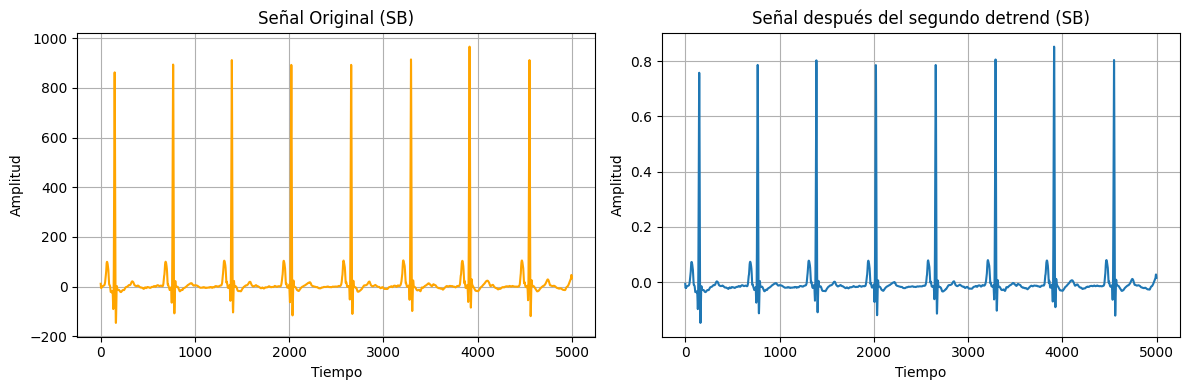

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(signal_SB, 'orange')
axs[0].set_title('Señal Original (SB)')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

axs[1].plot(signal_detrending_SB_2)
axs[1].set_title('Señal después del segundo detrend (SB)')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## **Gráfico de la Bicoherencia**

**NOTA:** Para esto, se calculó la bicoherencia para un sujeto de cada grupo

<ipython-input-15-306d8088e494>:20: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/denominador_bicoherencia
<ipython-input-16-3efea499d2d7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = bicoherencia[f1, f2]


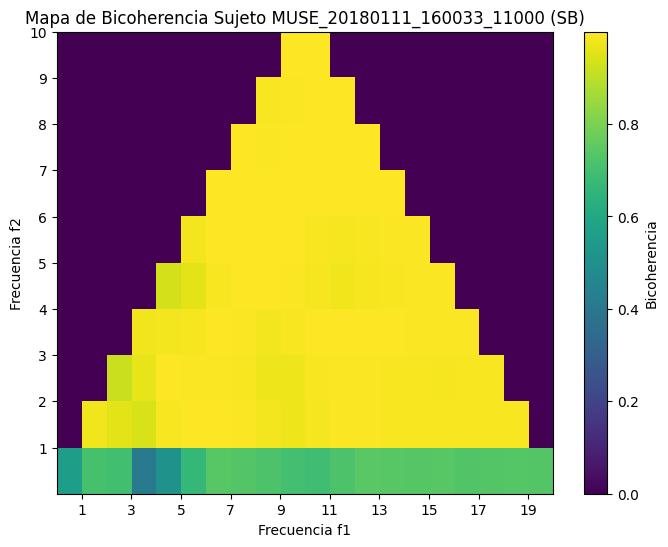

In [ ]:
segmentos = 500
fs = 500
# Lo anterior se hace para obtener una resolución de 1
Biesespectro_SB, Bicoherencia_SB = Bicoherencia_Biespectro(signal_detrending_SB_2, fs, segmentos)
bic_sim_SB = sim_bic(Bicoherencia_SB)
plt.figure(figsize=(8, 6))
plt.imshow(bic_sim_SB, extent=(0, 20, 0, 10), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Bicoherencia')
plt.title('Mapa de Bicoherencia Sujeto MUSE_20180111_160033_11000 (SB)')
plt.xlabel('Frecuencia f1')
plt.ylabel('Frecuencia f2')
plt.xticks(np.arange(1, 21, 2))  # Ajuste de ticks en el eje x
plt.yticks(np.arange(1, 11, 1))  # Ajuste de ticks en el eje y
plt.grid(False)  # Desactiva la cuadrícula si no es necesaria
plt.show()

Figura1. Este es un mapa de bicoherencia para el sujeto MUSE_20180111_160033_11000 diagnosticado con bradicardia sinusal (SB). El gráfico muestra la relación entre pares de frecuencias, f1 en el eje x y f2 en el eje Y, en la señal de ECG, con una escala de colores que varían desde púrpura (Baja bicoherencia) hasta amarillo (Alta bicoherencia), indicando la fuerza de la coherencia de fase entre las frecuencias. Un valor de bicoherencia cercano a 1, puede reflejar una característica no lineal en la señal de ECG, como la presencia de patrones de repetición específicos como la bradicardia sinusal.

<ipython-input-15-306d8088e494>:20: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/denominador_bicoherencia
<ipython-input-16-3efea499d2d7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = bicoherencia[f1, f2]


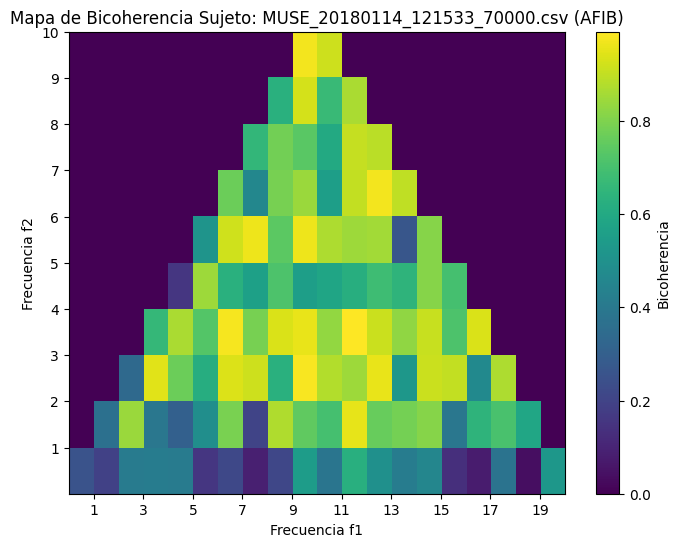

In [ ]:
segmentos = 500
fs = 500
Biesespectro_AFIB, Bicoherencia_AFIB= Bicoherencia_Biespectro(signal_detrending_AFIB_2, fs, segmentos)
bic_sim_AFIB = sim_bic(Bicoherencia_AFIB)
plt.figure(figsize=(8, 6))
plt.imshow(bic_sim_AFIB, extent=(0, 20, 0, 10), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Bicoherencia')
plt.title('Mapa de Bicoherencia Sujeto: MUSE_20180114_121533_70000.csv (AFIB)')
plt.xlabel('Frecuencia f1')
plt.ylabel('Frecuencia f2')
plt.xticks(np.arange(1, 21, 2))
plt.yticks(np.arange(1, 11, 1))
plt.grid(False)
plt.show()

Figura2. Este es un mapa de bicoherencia para el sujeto MUSE_20180114_121533_70000 diagnosticado con fibrilación auricular (AFIB). En los ejes x (f1) y Y (f2) se representan las frecuencias. En este gráfico se observa que las interacciones más fuertes ocurren en frecuencias intermedias, mientras que tanto en frecuencias bajas como altas la coherencia disminuye. Este patrón es característico de la fibrilación auricular, donde la actividad eléctrica del corazón es menos organizada, lo que se refleja en un espectro de frecuencias con interaciones no lineales más dispersas.

## **4. Para cada señal extraer la frecuencia que contiene la máxima potencia y Gráfiquela**

**NOTA**: Para la gráfica, solo se utilió un archivo de cada grupo (los mismos graficados para bicoherencia)

In [ ]:
def espectro_potencia_maxima_frec(signal, fs):
    # Se calcula la transformada rápida de fourier de la señal
    ftt = np.fft.fft(signal)
    # Se calcula la potencia
    power = np.abs(ftt)**2
    # Solo se toma en cuenta la mitad de los datos
    power = power[:len(power)//2]
    # Se extraen las frecuencias de la transformada de fourier
    frecuencias = np.fft.fftfreq(len(signal), 1/fs)
    frecuencias = frecuencias[:len(frecuencias)//2]
    # Se obtiene la posición en el que la potencia es la máxima
    idx_max = np.argmax(power)
    # Se obtiene la frecuencia de máxima potencia
    frecuencia_maxima_potencia = frecuencias[idx_max]
    return frecuencias, power , frecuencia_maxima_potencia

Frecuencia de máxima potencia para el archivo SB: 0.8
Frecuencia de máxima potencia para el archivo AFIB: 3.4000000000000004


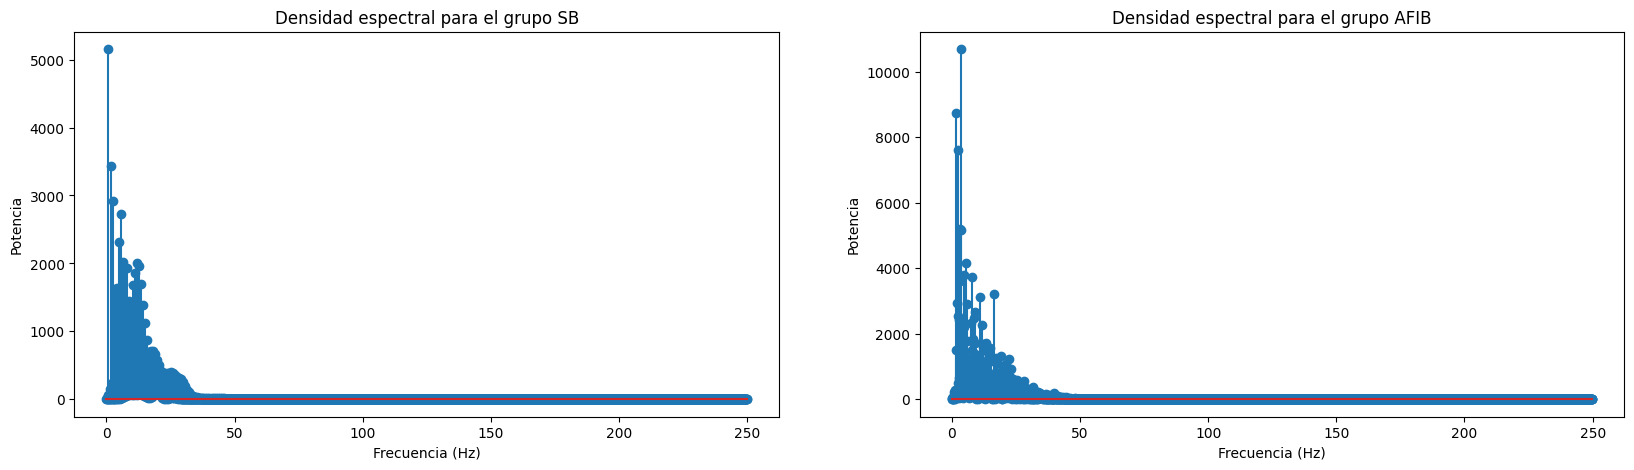

In [ ]:
fs = 500
freqs_SB, power_SB, frec_maxima_potencia_SB = espectro_potencia_maxima_frec(signal_detrending_SB_2, fs)
freqs_AFIB, power_AFIB, frec_maxima_potencia_AFIB = espectro_potencia_maxima_frec(signal_detrending_AFIB_2, fs)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(freqs_SB, power_SB)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Densidad espectral para el grupo SB")

plt.subplot(1,2,2)
plt.stem(freqs_AFIB, power_AFIB)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Densidad espectral para el grupo AFIB")

print(f"Frecuencia de máxima potencia para el archivo SB: {frec_maxima_potencia_SB}")
print(f"Frecuencia de máxima potencia para el archivo AFIB: {frec_maxima_potencia_AFIB}")

Figuras 3 y 4.

Ahora, aplicamos la función para cada uno de los sujetos, tanto para SB como AFIB

In [ ]:
fs = 500
list_max_frec_SB = []
for i, nombre in enumerate(df_SB['Nombre Archivo'].values):
    signal_detrending_SB_fMP = detrend(df_SB.loc[i, 'II'])
    signal_compression_SB_fMP = compression(signal_detrending_SB_fMP)
    signal_detrending_2_SB_fMP = detrend(signal_compression_SB_fMP)
    freqs, power, frec_maxima_potencia = espectro_potencia_maxima_frec(signal_detrending_2_SB_fMP, fs)
    data = {"Nombre Registro": nombre, "Estado": "SB", "fMP": frec_maxima_potencia}
    list_max_frec_SB.append(data)

df_SB_data = pd.DataFrame(list_max_frec_SB)
df_SB_data

,Nombre Registro,Estado,fMP
0,MUSE_20180116_181214_58000.csv,SB,0.8
1,MUSE_20180118_125051_70000.csv,SB,1.0
2,MUSE_20180118_125036_12000.csv,SB,2.7
3,MUSE_20180118_124944_51000.csv,SB,1.0
4,MUSE_20180118_124940_24000.csv,SB,2.9
...,...,...,...
3884,MUSE_20180115_133304_67000.csv,SB,1.9
3885,MUSE_20180114_073454_67000.csv,SB,3.9
3886,MUSE_20180115_133200_20000.csv,SB,9.2
3887,MUSE_20180115_133002_15000.csv,SB,1.0


In [ ]:
fs = 500
list_max_frec_AFIB = []
for i, nombre in enumerate(df_AFIB['Nombre Archivo'].values):
    signal_detrending_AFIB_fMP = detrend(df_AFIB.loc[i, 'II'])
    signal_compression_AFIB_fMP = compression(signal_detrending_AFIB_fMP)
    signal_detrending_2_AFIB_fMP = detrend(signal_compression_AFIB_fMP)
    freqs, power, frec_maxima_potencia = espectro_potencia_maxima_frec(signal_detrending_2_AFIB_fMP, fs)
    data = {"Nombre Registro": nombre, "Estado": "AFIB", "fMP": frec_maxima_potencia}
    list_max_frec_AFIB.append(data)

df_AFIB_data = pd.DataFrame(list_max_frec_AFIB)
df_AFIB_data

,Nombre Registro,Estado,fMP
0,MUSE_20180112_124050_59000.csv,AFIB,3.6
1,MUSE_20180113_124600_21000.csv,AFIB,2.3
2,MUSE_20180114_073251_45000.csv,AFIB,2.3
3,MUSE_20180114_115736_22000.csv,AFIB,16.5
4,MUSE_20180112_165409_12000.csv,AFIB,12.4
...,...,...,...
1775,MUSE_20180115_133556_54000.csv,AFIB,5.9
1776,MUSE_20180112_074903_07000.csv,AFIB,1.5
1777,MUSE_20180114_121533_70000.csv,AFIB,6.7
1778,MUSE_20180114_073026_18000.csv,AFIB,2.4


## **5. Para cada señal sumar el número de frecuencias que son significativas para bicoherencia**

Para esto, se utilizó la fórmula del umbral determinada en el artículo, teniendo en cuenta que el número de segmentos es de 10 y que la resolución es de 1.

In [ ]:
fs_ = 500
segmentos_ = 500
N = 10 # Número de segmentos (ya que cada uno se dividió entre 500 puntos y la señal tiene 5000 puntos)
umbral = np.sqrt((9.2)/(2*N))
umbral

0.6782329983125268

In [ ]:
list_sum_SB = []
for index, columna_SB in df_SB.iterrows():
    nombre_archivo = columna_SB['Nombre Archivo']
    signal_detrending_SB_sFSB = detrend(columna_SB['II'])
    signal_compression_SB_sFSB = compression(signal_detrending_SB_sFSB)
    signal_detrending_SB_2_sFSB= detrend(signal_compression_SB_sFSB)
    Biesespectro_SB__sFSB, Bicoherencia_SB__sFSB= Bicoherencia_Biespectro(signal_detrending_SB_2_sFSB, fs_, segmentos_)
    bic_sim_SB_sFSB = sim_bic(Bicoherencia_SB__sFSB)
    suma_SB_sFSB = np.sum(bic_sim_SB_sFSB > umbral)
    list_sum_SB.append(suma_SB_sFSB)

df_SB_data['sFSB'] = list_sum_SB
df_SB_data

<ipython-input-15-306d8088e494>:20: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/denominador_bicoherencia
<ipython-input-16-3efea499d2d7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = bicoherencia[f1, f2]


,Nombre Registro,Estado,fMP,sFSB
0,MUSE_20180116_181214_58000.csv,SB,0.8,86
1,MUSE_20180118_125051_70000.csv,SB,1.0,90
2,MUSE_20180118_125036_12000.csv,SB,2.7,85
3,MUSE_20180118_124944_51000.csv,SB,1.0,88
4,MUSE_20180118_124940_24000.csv,SB,2.9,90
...,...,...,...,...
3884,MUSE_20180115_133304_67000.csv,SB,1.9,89
3885,MUSE_20180114_073454_67000.csv,SB,3.9,91
3886,MUSE_20180115_133200_20000.csv,SB,9.2,90
3887,MUSE_20180115_133002_15000.csv,SB,1.0,90


In [ ]:
list_sum_AFIB = []
for index, columna_AFIB in df_AFIB.iterrows():
    nombre_archivo = columna_AFIB['Nombre Archivo']
    signal_detrending_AFIB_sFSB = detrend(columna_AFIB['II'])
    signal_compression_AFIB_sFSB = compression(signal_detrending_AFIB_sFSB)
    signal_detrending_AFIB_2_sFSB= detrend(signal_compression_AFIB_sFSB)
    Biesespectro_SB__sFSB, Bicoherencia_AFIB__sFSB= Bicoherencia_Biespectro(signal_detrending_AFIB_2_sFSB, fs_, segmentos_)
    bic_sim_AFIB_sFSB = sim_bic(Bicoherencia_AFIB__sFSB)
    suma_AFIB_sFSB = np.sum(bic_sim_AFIB_sFSB > umbral)
    list_sum_AFIB.append(suma_AFIB_sFSB)

df_AFIB_data['sFSB'] = list_sum_AFIB
df_AFIB_data

<ipython-input-15-306d8088e494>:20: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/denominador_bicoherencia
<ipython-input-16-3efea499d2d7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = bicoherencia[f1, f2]


,Nombre Registro,Estado,fMP,sFSB
0,MUSE_20180112_124050_59000.csv,AFIB,3.6,72
1,MUSE_20180113_124600_21000.csv,AFIB,2.3,55
2,MUSE_20180114_073251_45000.csv,AFIB,2.3,84
3,MUSE_20180114_115736_22000.csv,AFIB,16.5,39
4,MUSE_20180112_165409_12000.csv,AFIB,12.4,92
...,...,...,...,...
1775,MUSE_20180115_133556_54000.csv,AFIB,5.9,60
1776,MUSE_20180112_074903_07000.csv,AFIB,1.5,81
1777,MUSE_20180114_121533_70000.csv,AFIB,6.7,110
1778,MUSE_20180114_073026_18000.csv,AFIB,2.4,70


## **6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y la frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB)**

In [ ]:
# Se concatenan los dos DF de cada grupo que contienen la potencia máxima y el conteo de frecuencias
df_datos = pd.concat([df_SB_data,df_AFIB_data], ignore_index=True)
df_datos

,Nombre Registro,Estado,fMP,sFSB
0,MUSE_20180116_181214_58000.csv,SB,0.8,86
1,MUSE_20180118_125051_70000.csv,SB,1.0,90
2,MUSE_20180118_125036_12000.csv,SB,2.7,85
3,MUSE_20180118_124944_51000.csv,SB,1.0,88
4,MUSE_20180118_124940_24000.csv,SB,2.9,90
...,...,...,...,...
5664,MUSE_20180115_133556_54000.csv,AFIB,5.9,60
5665,MUSE_20180112_074903_07000.csv,AFIB,1.5,81
5666,MUSE_20180114_121533_70000.csv,AFIB,6.7,110
5667,MUSE_20180114_073026_18000.csv,AFIB,2.4,70


## **7. Análisis descriptivo**


In [ ]:
# Del data frame creado anteriormente, se extraen solo los valores de sFSB para cada grupo
df_SB_sFSB = df_SB_data[df_SB_data["Estado"] == "SB"][["Estado", "sFSB"]]
# Valores de sFSB para el grupo con SB
SB_sFSB=df_SB_sFSB['sFSB'].values

df_AFIB_sFSB = df_AFIB_data[df_AFIB_data["Estado"] == "AFIB"][["Estado", "sFSB"]]
# Valores de sFSB para el grupo con AFIB
AFIB_sFSB=df_AFIB_sFSB['sFSB'].values

# Del data frame creado anteriormente, se extraen solo los valores de fMP para cada grupo
df_SB_fMP = df_SB_data[df_SB_data["Estado"] == "SB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con SB
SB_fMP = df_SB_fMP['fMP'].values

df_AFIB_fMP = df_AFIB_data[df_AFIB_data["Estado"] == "AFIB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con AFIB
AFIB_fMP = df_AFIB_fMP['fMP'].values

### **Resúmen estadístico**

In [ ]:
df_SB_data= df_SB_data[df_SB_data["Estado"] == "SB"][["Estado", "fMP","sFSB"]]
df_SB_data.describe()

,fMP,sFSB
count,3889.000000,3889.000000
mean,2.692079,85.083569
std,2.380113,9.789212
min,0.200000,28.000000
25%,1.000000,78.000000
50%,2.700000,88.000000
75%,3.700000,90.000000
max,50.000000,110.000000


In [ ]:
df_AFIB_data= df_AFIB_data[df_AFIB_data["Estado"] == "AFIB"][["Estado", "fMP","sFSB"]]
df_AFIB_data.describe()

,fMP,sFSB
count,1780.000000,1780.000000
mean,4.289663,69.392697
std,3.283687,17.274794
min,0.100000,3.000000
25%,2.400000,58.000000
50%,3.400000,72.000000
75%,4.900000,82.000000
max,50.000000,110.000000


Lo anterior, es un resúmen estadístico de las características espectrales para cara grupo.

Según lo evidenciado, en los dos grupos coincide el valor máximo para las características espectrales, es decir, en los dos grupos el valor de fMP máximo es de 50 Hz y para el sFSB es de 110 frecuencias.

Así mismo, la desviación estándar es mayor para el grupo con AFIB en el caso de fMP lo que determina que los datos se encuentran más dispersos, lo cual también se puede interpretar como una mayor variabilidad de frecuencias máximas en el grupo con AFIB. Algo parecido sucede con el mismo grupo pero respecto a la sFSB, la cual cuenta con un alto valor de desviación estándar

Respecto a la media, para el caso del grupo con AFIB, la fMP tiene un valor de mediana mayor respecto al grupo con SB, lo que puede indicar que las frecuencias con máxima potencia pueden ser mayores en pacientes con AFIB.


###**Diagramas de cajas y bigotes para cada característica espectral en cada grupo**

<ipython-input-126-b55b5c941151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_datos, x='Estado', y='sFSB', palette="Set2", ax=axs[0])
<ipython-input-126-b55b5c941151>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_datos, x='Estado', y='fMP',palette="Set2", ax=axs[1])


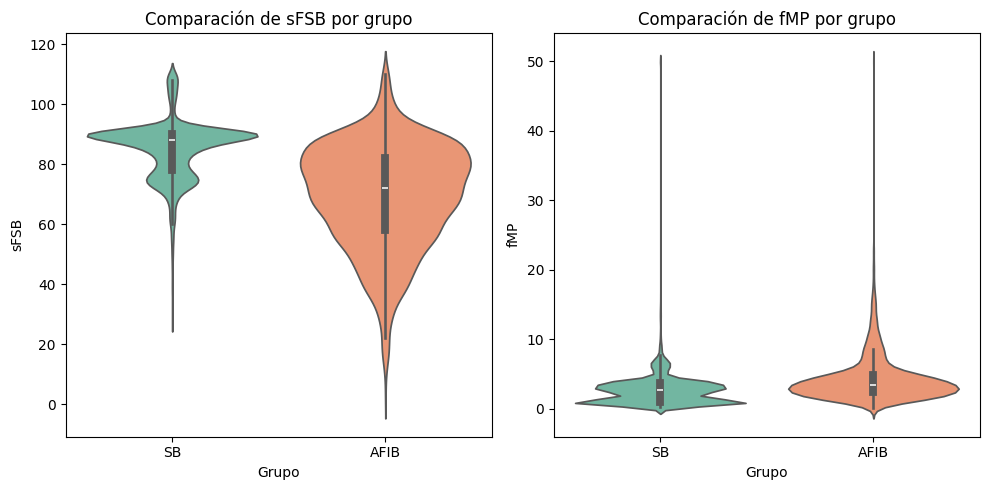

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(data=df_datos, x='Estado', y='sFSB', palette="Set2", ax=axs[0])
axs[0].set_title('Comparación de sFSB por grupo')
axs[0].set_xlabel('Grupo')
axs[0].set_ylabel('sFSB')
sns.violinplot(data=df_datos, x='Estado', y='fMP',palette="Set2", ax=axs[1])
axs[1].set_title('Comparación de fMP por grupo')
axs[1].set_xlabel('Grupo')
axs[1].set_ylabel('fMP')
plt.tight_layout()
plt.show()

Figura 5. Diagrama de violín para comparar la sFSB y la fMP entre pacientes con SB y AFIB.

###**Histogramas para evidenciar las diferencias entre cada característica espectral en cada grupo**

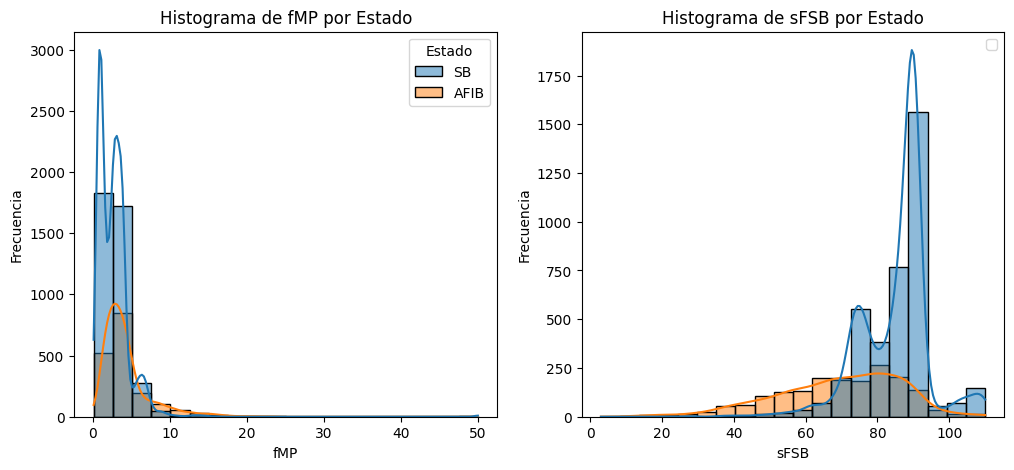

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df_datos, x='fMP', hue='Estado', bins=20, kde=True, legend=True,ax=axs[0])
axs[0].set_title('Histograma de fMP por Estado')
axs[0].set_xlabel('fMP')
axs[0].set_ylabel('Frecuencia')
plt.legend()
sns.histplot(data=df_datos, x='sFSB', hue='Estado', bins=20, kde=True, legend=True,ax=axs[1])
axs[1].set_title('Histograma de sFSB por Estado')
axs[1].set_xlabel('sFSB')
axs[1].set_ylabel('Frecuencia')
plt.legend()
plt.show()

Figura 6. Histogramas comparativos de los parámetros fMP y sFSB en SB y AFIB. EL histograma de fMP muestra una distribución más concentrada en SB y más dispersa en AFIB. El histograma de sFBS presenta una distribución bimodal en SB y una más uniforme y amplia en AFIB, reflejando la mayor irregularidad de esta última.



## **8. Análisis inferencial**

Primero, es necesario realizar un análisis sobre qué tipo de prueba estadística utilizar (paramétrica o, no paramétrica). Para ello, sabemos que **los datos son robustos, dado que tenemos más de 5mil observaciones**

Ahora, como tenemos un tamaño de muestra robusta, podríamos utilizar una prueba paramétrica, dado que en estas pruebas, entre mayor número de observaciones, mayor exactitud. Sin embargo, como no concemos su distrubición ni homogenieidad, no podemos determinar esto, por lo tanto, analizaremos los supuestos (prueba de normalidad y prueba de homogeneidad)




### **Prueba de normalidad:**

Primero realizaremos un análisis de de distribución de los datos y para ello, utilizaremos una prueba de bondad para conocer el tipo de distribución de fMF y sFSB y así, determinar el tipo de prueba estadística a utilizar.

**Como el tamaño de muestra es robusto (tiene más de 90 datos), utilizaremos la prueba de Kolmogorov Smirnov (KS)**, utilizando las siguiente hipótesis:

- **Hipótesis nula (Ho):** los datos siguen una distribución normal

- **Hipótesis alternativa (Ha):** los datos no siguen una distribución normal

In [ ]:
stat_normalidad_fMP_SB, p_valor_normalidad_fMP_SB = stats.kstest(SB_fMP, 'norm')
print(f'P-valor para fMP para el grupo con SB es: {p_valor_normalidad_fMP_SB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_SB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con SB para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB no siguen una distribución normal.')

P-valor para fMP para el grupo con SB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB no siguen una distribución normal.


In [ ]:
stat_normalidad_sFSB_SB, p_valor_normalidad_sFSB_SB = stats.kstest(SB_sFSB, 'norm')
print(f'P-valor para sFSB para el grupo con SB es: {p_valor_normalidad_sFSB_SB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_sFSB_SB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el sFSB del grupo con SB para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el sFSB del grupo con SB no siguen una distribución normal.')

P-valor para sFSB para el grupo con SB es: 0.0000
Se rechaza la hipótesis nula. Los datos el sFSB del grupo con SB no siguen una distribución normal.


In [ ]:
stat_normalidad_fMP_AFIB, p_valor_normalidad_fMP_AFIB = stats.kstest(AFIB_fMP, 'norm')
print(f'P-valor para fMP para el grupo con AFIB es: {p_valor_normalidad_fMP_AFIB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_AFIB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB no siguen una distribución normal.')

P-valor para fMP para el grupo con AFIB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB no siguen una distribución normal.


In [ ]:
stat_normalidad_sFSB_AFIB, p_valor_normalidad_sFSB_AFIB = stats.kstest(AFIB_sFSB, 'norm')
print(f'P-valor para sFSB para el grupo con AFIB es: {stat_normalidad_sFSB_AFIB:.4f}')
print(f'P-valor para MMSE: {p_valor_normalidad_sFSB_AFIB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_sFSB_AFIB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el sFSB del grupo con AFIB para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el sFSB del grupo con AFIB no siguen una distribución normal.')

P-valor para sFSB para el grupo con AFIB es: 0.9994
P-valor para MMSE: 0.0000
Se rechaza la hipótesis nula. Los datos el sFSB del grupo con AFIB no siguen una distribución normal.


Según lo anterior, se puede determinar que, las características espectrales de sFSB y fMP no cuentan con una distribución normal para ninguno de los dos grupos evaluados. Por lo tanto, se determina que **no se cumple el supuesto de normalidad**

### **Supuesto de Homocedasticidad**

Para verificar si si cumple o no este supuesto, se utilizó la prueba de levene, haciendo uso de los siguientes supestos

**Supuestos**:

- **Hipótesis Nula (H0)**:  los datos proceden de distribuciones con la misma varianza

- **Hipótesis Alternativa (Ha)**: los datos no proceden de distribuciones con la misma varianza

In [ ]:
fMP = df_datos["fMP"]
sFSB = df_datos["sFSB"]
stat_homogeneidad_sFSB_fMP, p_valor_homogeniedad_sFSB_fMP = stats.levene(fMP, sFSB, center='median')
print(f'P-valor: {p_valor_homogeniedad_sFSB_fMP:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_homogeniedad_sFSB_fMP > alfa:
  print('No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.')
else:
  print('Se rechaza la hipótesis nula. Los datos no proceden de distribuciones con la misma varianza.')

P-valor: 0.0000
Se rechaza la hipótesis nula. Los datos no proceden de distribuciones con la misma varianza.


Según lo evidenciado anteriormente, las características espectrales de sFSB y fMP no pertenen a distribuciones de la misma varianza, por lo que  **existe heteroscedasticidad (no se cumple el supuesto)**

### **Supuesto Independencia de las observaciones**

Para verificar el cumplimiento o no de este supuesto, se realizó una matríz de correlación para cada grupo, con el fin de identificar como se relacionan o dependen entre sí las variables

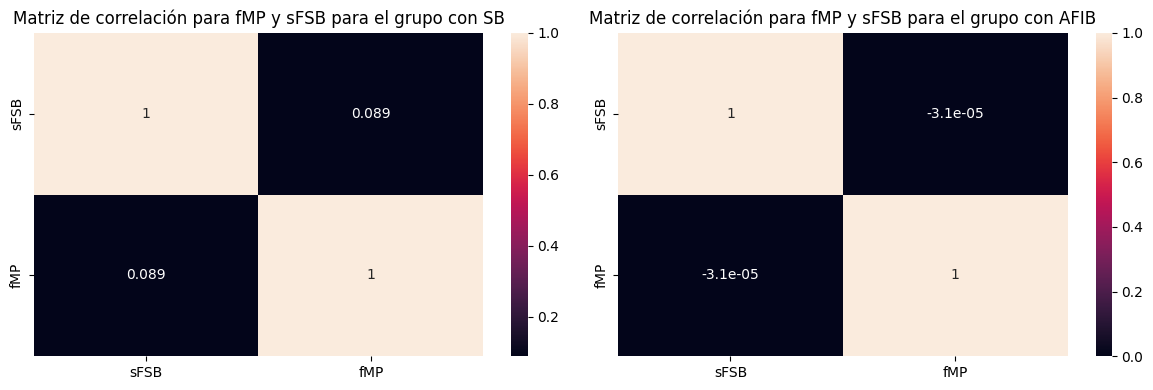

In [ ]:
# Solo extreyendo las columnas numéricas del data frame para el grupo SB
df_SB = df_SB_data[df_SB_data["Estado"] == "SB"][["sFSB","fMP"]]
df_AFIB = df_AFIB_data[df_AFIB_data["Estado"] == "AFIB"][["sFSB","fMP"]]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Matriz de correlación para SB
sns.heatmap(df_SB.corr(), fmt='.2g', annot=True, ax=axes[0])
axes[0].set_title("Matriz de correlación para fMP y sFSB para el grupo con SB")
# Matriz de correlación para AFIB
sns.heatmap(df_AFIB.corr(), fmt='.2g', annot=True, ax=axes[1])
axes[1].set_title("Matriz de correlación para fMP y sFSB para el grupo con AFIB")
plt.tight_layout()
plt.show()

Según lo evidenciado en la matriz para el grupo de SB,  es posible determinar que para las características espectrales, las mismas no se encuentran relacionadas, dado que se evidencian correlaciones cercanas a cero, lo que indica que se **cumple el supuesto de independencia de las observaciones para este grupo (SB)**

Sin embargo, para el grupo con AFIB, se evidencian correlaciones negativas, lo que indica que si el valor de fMP, por ejemplo, aumenta, el valor de sFSB disminuye. **Según lo anterior, se puede decir que para el grupo AFIB, se cumple el supuesto de independencia de las observaciones**

### **Prueba no paramétrica:**

Según lo evidenciado anteriormente, no se cumplieron los supuestos solicitados para poder aplicar una prueba parámetrica, por lo tanto, **es necesario aplicar una prueba no paramétrica.**

Debio a que con la prueba de Mann - Whitney, es posible comparar las medias de dos grupos, **se comparará las diferencias significativas entre las características espectrales de fMP para los dos grupos y de igual forma con sFSB**

In [ ]:
stat_no_parametrica_sFSB, p_valor_no_parametrica_sFSB = stats.mannwhitneyu(SB_sFSB, AFIB_sFSB, alternative='two-sided')
alfa = 0.05  # Nivel de significancia
if p_valor_no_parametrica_sFSB < alfa:
    print(f'p-value = {p_valor_no_parametrica_sFSB} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre sFBS para los grupos evaluados')
else:
    print(f'p-value = {p_valor_no_parametrica_sFSB} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre sFBS para los grupos evaluados')

p-value = 5.260744775070678e-275 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre sFBS para los grupos evaluados


In [ ]:
stat_no_parametrica_fMP, p_valor_no_parametrica_fMP = stats.mannwhitneyu(SB_fMP, AFIB_fMP, alternative='two-sided')
alfa = 0.05  # Nivel de significancia
if p_valor_no_parametrica_fMP < alfa:
    print(f'p-value = {p_valor_no_parametrica_fMP} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre fMP para los grupos evaluados')
else:
    print(f'p-value = {p_valor_no_parametrica_fMP} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre fMP para los grupos evaluados')

p-value = 2.8670168849961355e-118 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre fMP para los grupos evaluados


Según lo anterior, se puede determinar que la frecuencia de máxima potencia puede ser un factor diferencial entre los dos grupos. Así mismo se evidencia un poder discriminativo con el conteo de frecuencias que superaron el umbral. Se ampliará un poco más este análisis respecto a lo presentado en el artículo base.

# **Informe de los resultados obtenidos**

### **Gráfica de bicoherencia para un sujeto de cada grupo** (Figura 1 y 2)


En un paciente con bradicardia sinusal (SB), el corazón late a una frecuencia más baja, lo que concentra la mayor parte de la energía de la señal ECG en las frecuencias bajas. Esto se debe a que los ciclos cardíacos son más largos, y por lo tanto, las oscilaciones en la señal ocurren más lentamente [1]. En un análisis de bicoherencia, estas frecuencias bajas mostrarán mayor coherencia debido al ritmo cardíaco lento y predecible.

Por otro lado, las frecuencias más altas, superiores a los 10 Hz, están asociadas con fenómenos rápidos o transitorios en el corazón. En pacientes con bradicardia sinusal, no se espera la presencia de estos cambios rápidos en la actividad eléctrica, lo que reduce la amplitud de las frecuencias altas en el espectro. Esto se refleja en la Figura 1, donde las altas frecuencias tienden a mostrar una baja bicoherencia, lo que indica que no hay interacciones significativas entre los componentes de alta frecuencia. Este comportamiento es coherente con la naturaleza de la bradicardia sinusal, que genera ritmos más lentos y estables [1].

En la Figura 1, el punto de mayor bicoherencia se observa en f1=10, f2=10, lo que sugiere que en estas frecuencias intermedias es donde se producen las interacciones no lineales más significativas entre los componentes de la señal ECG. Cuando f2 disminuye por debajo de 10 Hz, o f1 se aleja de este valor, la bicoherencia empieza a disminuir, como se observa en la transición de colores amarillo a verde y púrpura en el gráfico. Esto indica que las interacciones entre frecuencias más bajas no son tan fuertes en términos de coherencia de fase, probablemente porque los componentes de baja frecuencia están dominados por las frecuencias del latido cardíaco, pero no interactúan de manera tan compleja entre sí [1].

De manera similar, al moverse hacia f1 y f2 por encima de 10 Hz, también se observa una disminución en la bicoherencia. Las altas frecuencias están menos presentes en la señal ECG de un paciente con bradicardia sinusal y, por tanto, no muestran una coherencia fuerte. Esto es consistente con la bradicardia sinusal, donde predominan las frecuencias bajas debido al ritmo cardíaco lento, mientras que las frecuencias altas son menos relevantes [1].


En un paciente con fibrilación auricular (AFIB), el ritmo cardíaco es irregular y rápido debido a una activación caótica de los impulsos eléctricos en las aurículas[2]. Esto se refleja claramente en la Figura 2.

A frecuencias bajas, con valores de f1 y f2 por debajo de los 5 Hz, se observa una bicoherencia moderada, representada por colores verdes y azulados. Esto sugiere una actividad irregular pero relativamente estable en estas frecuencias bajas. Esta irregularidad podría estar relacionada con las alteraciones en la activación auricular, ya que la actividad de baja frecuencia, vinculada al ritmo cardíaco, no presenta una coherencia fuerte debido a las interrupciones en el ciclo cardíaco [2].

En las frecuencias intermedias, entre 5 y 10 Hz, se observa la mayor concentración de bicoherencia, con un pico alrededor de f1 = 9 Hz y f2 = 9 Hz, donde predominan los colores más intensos. Esto indica que, a pesar de la irregularidad general del ritmo cardíaco, existen patrones de interacción no lineal entre las componentes de estas frecuencias que son más consistentes y predecibles. Estos patrones podrían estar asociados con las ondas fibrilatorias en las aurículas, que aunque son desorganizadas, muestran cierta repetitividad dentro de este rango de frecuencias [2].

Finalmente, en las altas frecuencias, por encima de los 10 Hz, la bicoherencia disminuye considerablemente, como lo indican los colores más oscuros, verde y púrpura. Esto refleja una menor interacción entre las componentes de alta frecuencia, lo cual es coherente con la fibrilación auricular, donde las frecuencias altas, normalmente asociadas con fenómenos eléctricos transitorios rápidos, tienen poca relevancia debido a la caótica actividad en las aurículas [2].

### **Análisis de la estadística descriptiva implementada**


### **Gráfico de violín** (Figura 5)

El análisis de los gráficos de sFSB revela diferencias notables en la distribución de esta métrica entre SB y AFIB. En el caso de SB, se observa en la Figura 5. una distribución más estrecha y concentrada [3][4], con un pico claro alrededor de los valores de 90 a 95. Esto contrasta con la distribución en AFIB, que es mucho más amplia y dispersa, abarcando un rango que va desde valores cercanos a 0 hasta más de 100.

Al comparar la mediana y el intervalo intercuartílico (IQR) [3][4], en SB la mediana se encuentra cerca de 90-95, con un IQR relativamente pequeño, lo que sugiere una baja variabilidad en los datos. En cambio, en AFIB la mediana es notablemente más baja, alrededor de 70-75, y el IQR es considerablemente mayor, lo que refleja una mayor dispersión de las frecuencias significaativas.

La forma de la distribución también es diferente entre ambas condiciones. En SB, la distribución es unimodal y simétrica [3][4], lo que indica una mayor consistencia en las frecuencias detectadas. En AFIB, sin embargo, la distribución es asimétrica, con una cola que se extiende hacia valores más bajos, lo que sugiere una mayor variabilidad en las frecuencias significativas [3][4].

Al analizar los gráficos de fMP, se observan patrones similares. En SB, la distribución está muy concentrada en valores bajos, típicamente entre 0 y 5 Hz, aunque con algunos valores atípicos. Por su parte, AFIB muestra una distribución más dispersa, con mayor concentración en frecuencias bajas, pero con una cola que se extiende hasta aproximadamente 20Hz.

La mediana y el IQR de fMP también presentan diferencias notables entre ambas arritmias. En SB, la mediana está cerca de 0-1 Hz, con un IQR muy pequeño, lo que indica que la potencia máxima se concentra en frecuencias muy bajas. En AFIB,la mediana es algo más alta, alrededor de 2-3 Hz, y el IQR más amplio sugiere una amyor dispersión de las frecuencias de potencia máxima.

La forma de la distribución de fMP en SB es muy asimétrica, con la mayoría de los datos concentrados en frecuencias bajas. En AFIB, aunque también hay una concentración en valores bajos, la distribución es más dispersa, con una cola larga hacia frecuencias más altas, lo que refleja una mayor variabilidad en la potencia máxima.

Fisiológicamnete, estas diferencias también están alineadas con las características de las dos arritmias. En la bradicardia sinusal, la frecuencia cardiaca es baja pero regular, lo que se refleja en la concentración de fMP en frecuencias muy bajas, típicas de un ritmo lento. En AFIB, aunque la mayor concentración sigue estando en frecuencias bajas, la mayor dispersión y la cola hacia frecuencias más altas indican la presencia de componentes de frecuencia más variables, coherente con la naturaleza irregular y frecuentemente más rápida de esta arritmia [1][2].



### **Histograma** (Figura 6)

En el caso de los histogramas de fMP, la distribución SB presenta una clara asimetría hacia la derecha [5], con una cola extendida hacias valores más altos y un pico pronunciado en el rango de 0-5 fMP. La mayoría de los valores se concentran entre 0 y 10 fMP, aunque se observan algunos casos que alcanzan hasta 50 fMP. Para AFIB, aunque la distribución es similar, se aprecia una menor frecuencia en comparación con SB y un pico menos marcado, también alrededor de 0-5 fMP. Sin embargo, el rango general siguie siendo comparable, extendiéndose hasta los 50 fMP.

Fisiológicamente, un valor más bajo de fMP en SB está asociado con latidos más lentos y regulares, característicos de la bradicardia sinusal. En cambio, la mayor dispersión observada en AFIB refleja una mayor variabilidad en los intervalos entre latidos, lo que es típico de la fibrilación auricular.

Por otro lado, los histogramas del parámetro sFSB muestran una clara diferenciación en la forma de las distribuciones entre ambas patologías. En SB, la distribución es bimodal [5], con picos evidentes alrededor de 80 y 95 sFSB, y un rango principal que va de 60 a 100 sFSB. En AFIB, la distribución es más uniforme y dispersa, cubriendo un rango más amplio, de 20 a 100 sFBS, con frecuencias notables a partir de los 40 sFSB.

Desde una perspectiva fisiológica, el sFSB más elevado y concentrado en SB refleja una mayor regularidad en el ritmo cardíaco. En contraste, la dispersión observada en AFIB indica la irregularidad característica de esta arritmia.

El análisis combinado de estos dos parámetros, fMP y sFSB, permite distinguir de manera màs eficiente entre SB y AFIB. Mientras que el fMP muestra diferencias sutiles pero significativas entre ambas patologías, el sFSB revela variaciones marcadas, convietiéndose en un indicador más robusto para distinguir entre estas arritmias. En SB, un fMP bajo acompañado de un sFSB alto indica un ritmo lento pero regular, y la bimodalidad observada en la distribución de sFSB podría sugerir la existencia de subtipos de bradicardia sinusal o diferentes grados de severidad [1]. En AFIB, la mayor variabilidad tanto en fMP como en sFSB pone de manifiesto la naturaleza irregular de la fibrilación auricular, con la dispersión del sFSB siendo particularmente indicativa de esta arritmia.


### **Análisis de la estadística inferencial implementada y de los espectros de potencia** (Figuras 3 y 4)


Según lo evidenciado al aplicar la prueba paramétrica de Mann Whitey para el conjunto de datos pertenecientes a las frecuencias de máxima potencia de cada grupo (fMP) y del número de frecuencias con bicoherencia significativa (sFSB) también para cada grupo, se puede determinar que estos dos tipos de características espectrales tienen la capacidad de ser factores diferenciales entre las dos enfermedades. Lo anterior, es algo que se plantea en el articulo base (*Higher order spectral analysis of ECG signals*), dado que en el mismo, se realiza un análisis tanto del espectro de potencias como de parámetros biespectrales como la bicoherencia determinado como un análisis espectral de orden superior.

Si bien en el artículo se plantean que el análisis espectral de potencia tienen características lineales que no se acoplan a las características no lineales de este tipo de bioseñales, los resultados de la prueba estadística determinan que si es posible encontrar diferencias entre los dos grupos. Sin embargo, según lo evidenciado en los gráficos utilizados para exponer el espectro de potencia de un sujeto de cada grupo (figuras 3 y 4), es muy complicado realizar un análisis de la distribución de las frecuencias, ya que muchas de ellas se solapan entre sí.


Por otro lado, respecto al análisis de las frecuencias que superan el umbral determinado, en el artículo utilizan estas características espectrales como un análisis espectral de segundo orden, con mayor capacidad de discriminación entre pacientes sanos y con arritmias. Lo anterior es algo que se comprobó en este proyecto, si bien no con pacientes sanos, pero si con pacientes con dos tipos de arritmia diferentes.

Finalmente, como se determinó al evaluar la independencia de los dos grupos como uno de los supuestos para determinar qué tipo de prueba paramétrica utilizar, se evidenció una correlación negativa para el grupo con AFIB, lo que en cierta medida es interesante, dado que si existe un aumento de las frecuencias con potencia máxima, habrá un decremento del conteo de frecuencias que superaron el umbral. Lo anterior, puede deberse a que como se determinó en el análisis estadítico, los pacientes con AFIB cuenta con una mayor variabilidad en el ritmo cardiaco



### **Conclusiones**



*   Se puede concluir, que fMP y sFSB son características espectrales que permiten actuar como factores diferenciadores entre las dos enfermedades evaluadas (SB y AFIB) a través del análisis estadístico inferencial realizado.


*   La combinación de los parámetros fMP y sFSB, junto con el análisis de bicoherencia, permite diferenciar de manera efectiva entre bradicardia sinusal y fibrilación auricular, destacando la mayor regularidad y coherenca en frecuencias bajas en SB frente a la mayor variabilidad e irregularidad del ritmo cardíaco en AFIB.

*   Por otro lado, también se puede concluir que, según lo evidenciado al momento de programar, encontrar la bicoherencia exige un gasto computacional grande que determina una limitación en este método, ya que aproximadamente, demoró 3h para poder obtener los resultados para los más de 5 mil sujetos evidenciados. En contraste, encontrar los resultados para el análisis de la frecuencia con máxima potencia no determinó tal limitación con el mismo número de datos.






### **Referencias**


[1] Y. Hafeez y S. A. Grossman, «Sinus bradycardia», StatPearls - NCBI Bookshelf, 7 de agosto de 2023. https://www.ncbi.nlm.nih.gov/books/NBK493201/

[2] Z. Nesheiwat, A. Goyal, y M. Jagtap, «Atrial fibrillation», StatPearls - NCBI Bookshelf, 26 de abril de 2023. https://www.ncbi.nlm.nih.gov/books/NBK526072/

[3] «Diagrama de violín». https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html

[4] «¿Cómo se pueden utilizar los diagramas de violín para comparar datos entre grupos?», www.linkedin.com, 14 de diciembre de 2023. https://www.linkedin.com/advice/3/how-can-you-use-violin-plots-compare-data-across-groups-pgooc?lang=es&originalSubdomain=es

[5] M. V. Mestres, «¿Cómo se interpreta un histograma?», Addlink Software Científico, 10 de noviembre de 2023. https://www.addlink.es/noticias/minitab/3350-como-se-interpreta-un-histograma


